In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from mislabelling import symmetric_noise, pair_noise
from testing import *
from sklearn.utils import Bunch
from AdjustedRandomForest import train
import matplotlib.pyplot as plt
np.random.default_rng(42)

Generator(PCG64) at 0x1A96B366B20

In [ ]:
# Load the data
data1 = np.loadtxt("Data/gmm5test.txt")
data2 = np.loadtxt("Data/gmm5train.txt")

#dataset = np.vstack((data1, data2))
dataset = data2

print(dataset.shape)

np.random.shuffle(dataset)

# Split into features and labels
X = dataset[:, :2]  # first two columns: features
y = dataset[:, 2].astype(int)   # third column: labels

sklearn_like = {
    'data': X,
    'target': y,
    'feature_names': ['feature_1', 'feature_2'],
    'target_names': [0, 1],
    'DESCR': 'GMM5',
}

data = Bunch(**sklearn_like)

NameError: name 'load_wine' is not defined

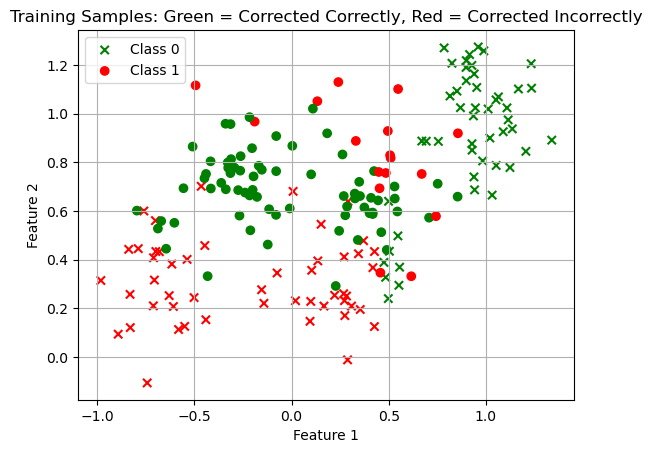

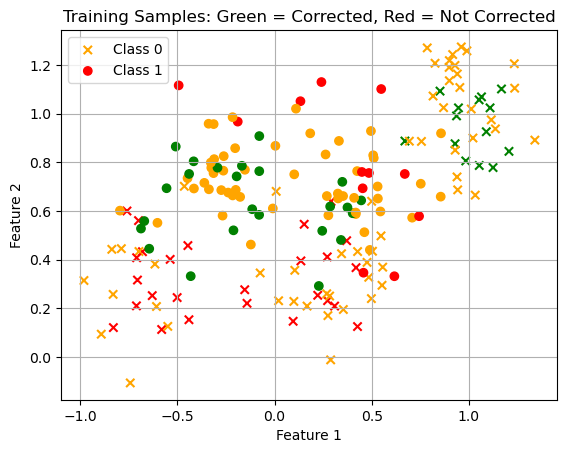

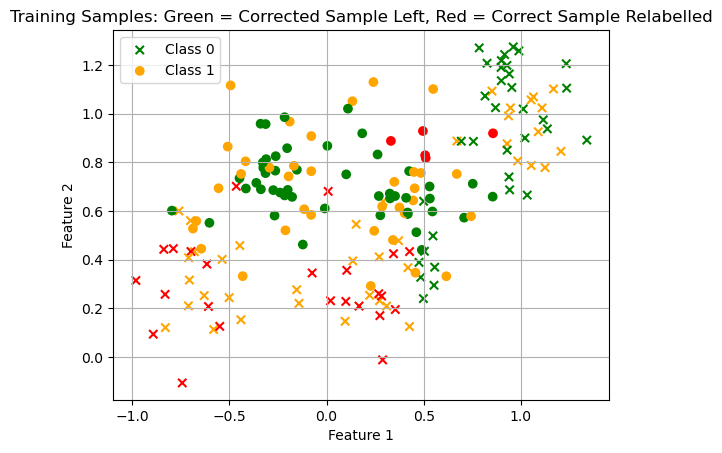

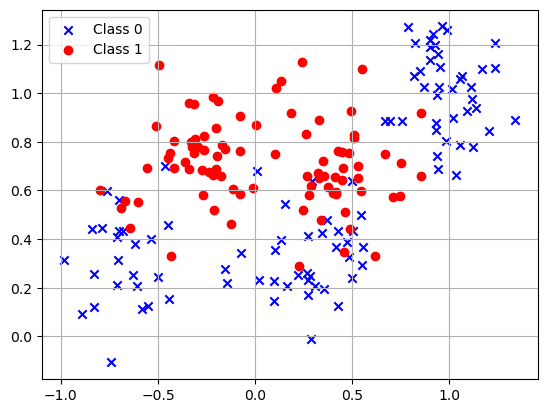

In [ ]:
# 0.4 Noise
X_train, X_test, y_train, y_test = train_test_split(
                data.data, data.target, test_size=0.25
            )
y_mislabelled = symmetric_noise(np.copy(y_train), 0.4)
rf_40, corrected_y = train(RandomForestClassifier, X_train, y_mislabelled, data.target_names, 20)

# Separate samples by class (assuming binary classification: 0 and 1)
class0_idx = y_train == 0
class1_idx = y_train == 1

# Get colors: green if corrected label is correct, red otherwise
colors = ['green' if y_true == y_corr else 'red' 
          for y_true, y_corr in zip(y_train, corrected_y)]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Correctly, Red = Corrected Incorrectly")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if sample was mislabelled and relabelled correctly, red otherwise
colors = ['orange' if y_mislabelled[i] == y_train[i] else 'green' if y_mislabelled[i] != y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected, Red = Not Corrected")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if correct sample was left alone, red otherwise
colors = ['orange' if y_mislabelled[i] != y_train[i] else 'green' if y_mislabelled[i] == y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Sample Left, Red = Correct Sample Relabelled")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c='blue', marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c='red', marker='o', label='Class 1')
plt.legend()
plt.grid(True)
plt.show()

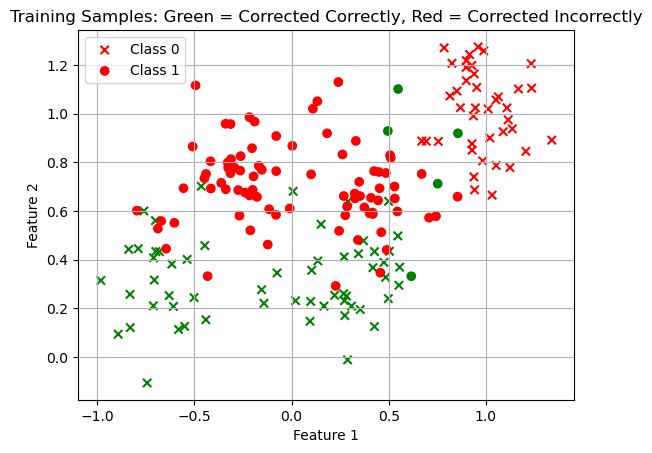

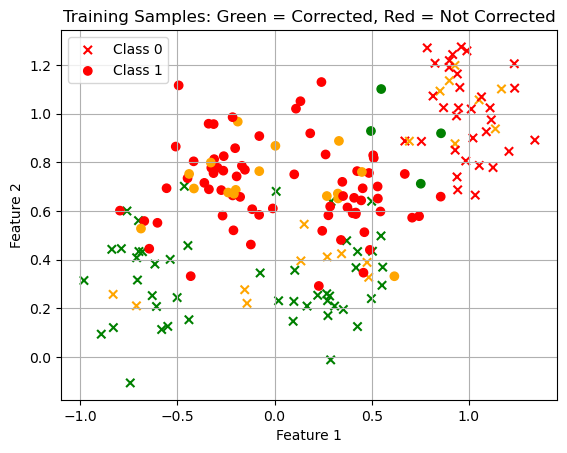

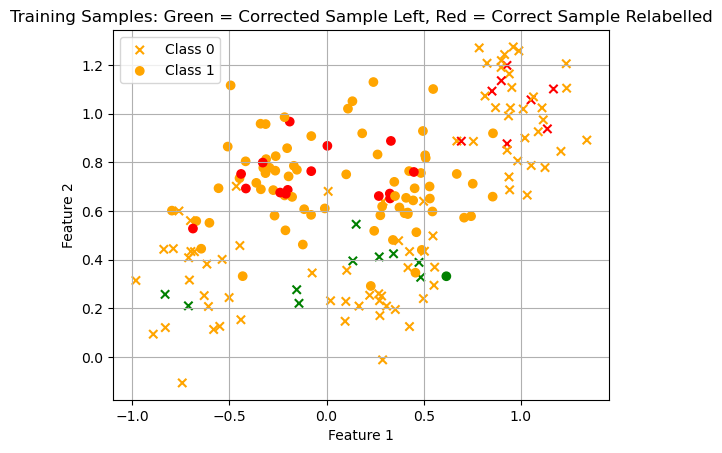

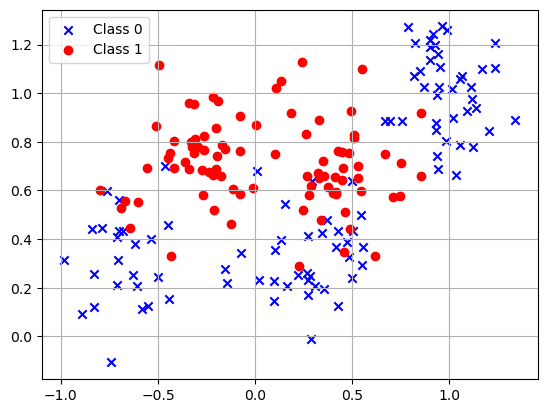

In [ ]:
y_mislabelled = symmetric_noise(np.copy(y_train), 0.1)
rf_10, corrected_y = train(RandomForestClassifier, X_train, y_mislabelled, data.target_names, 20, initial_certainty=0.95, bootstrapping=True)

y_mislabelled = symmetric_noise(np.copy(y_train), 0.8)
rf_80, corrected_y = train(RandomForestClassifier, X_train, y_mislabelled, data.target_names, 20, initial_certainty=0.65)

# Separate samples by class (assuming binary classification: 0 and 1)
class0_idx = y_train == 0
class1_idx = y_train == 1

# Get colors: green if corrected label is correct, red otherwise
colors = ['green' if y_true == y_corr else 'red' 
          for y_true, y_corr in zip(y_train, corrected_y)]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Correctly, Red = Corrected Incorrectly")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if sample was mislabelled and relabelled correctly, red otherwise
colors = ['orange' if y_mislabelled[i] == y_train[i] else 'green' if y_mislabelled[i] != y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected, Red = Not Corrected")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if correct sample was left alone, red otherwise
colors = ['orange' if y_mislabelled[i] != y_train[i] else 'green' if y_mislabelled[i] == y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Sample Left, Red = Correct Sample Relabelled")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c='blue', marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c='red', marker='o', label='Class 1')
plt.legend()
plt.grid(True)
plt.show()

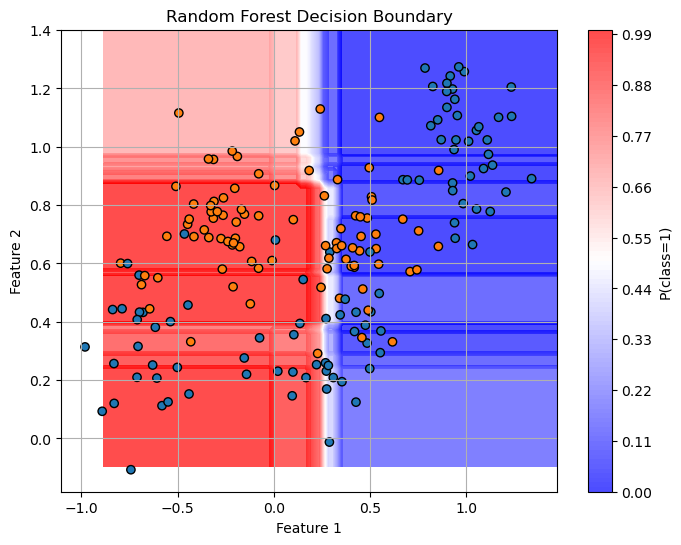

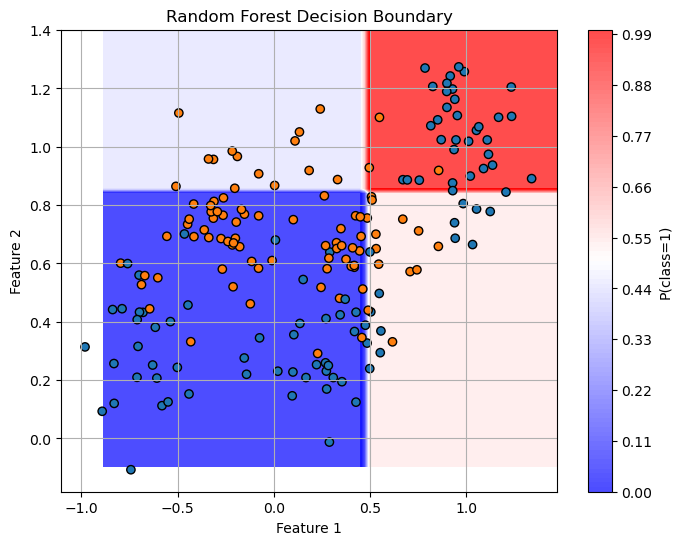

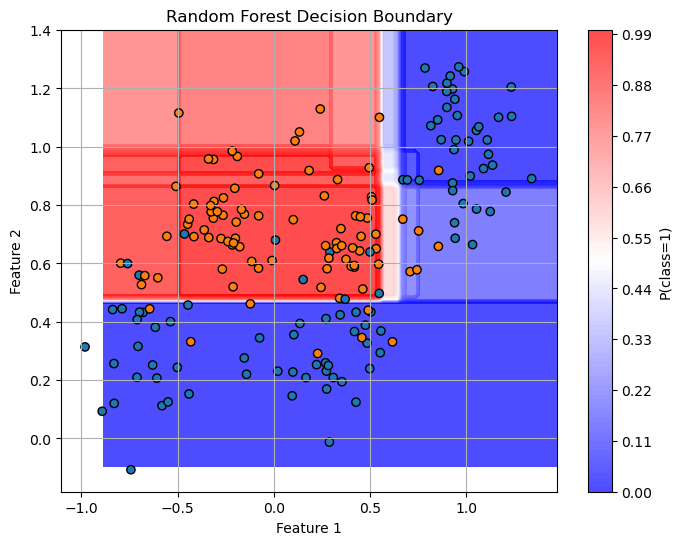

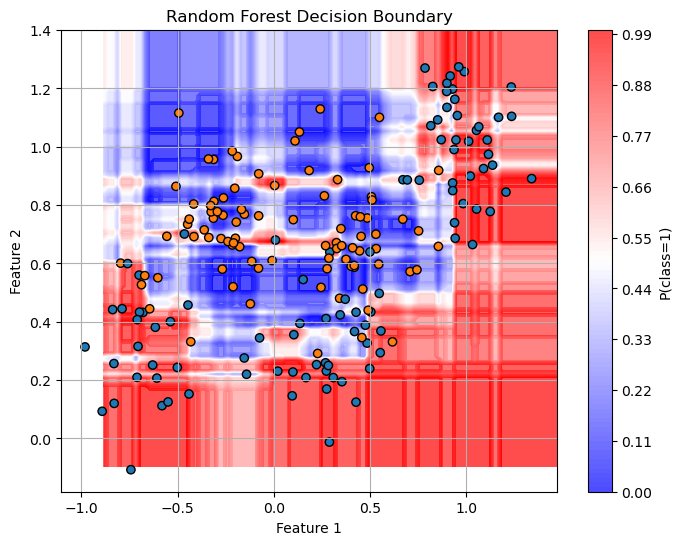

In [42]:
rf_ctrl_80 = RandomForestClassifier(20)
rf_ctrl_80.fit(X_train, y_mislabelled)
plot_rf_decision_boundary(rf_40, X_train, y_train)
plot_rf_decision_boundary(rf_80, X_train, y_train)
plot_rf_decision_boundary(rf_10, X_train, y_train)
plot_rf_decision_boundary(rf_ctrl_80, X_train, y_train)

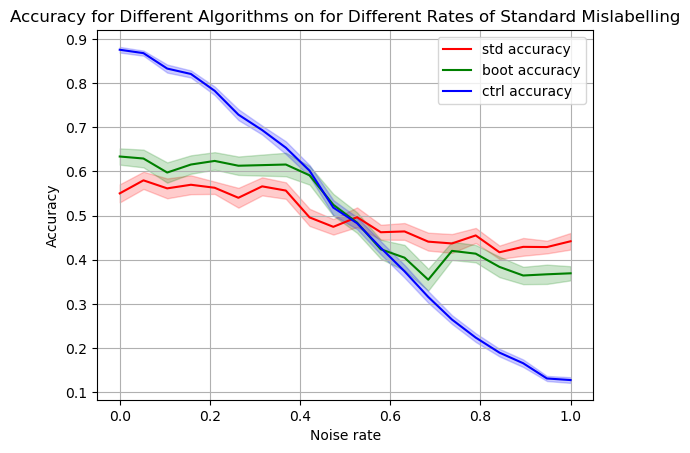

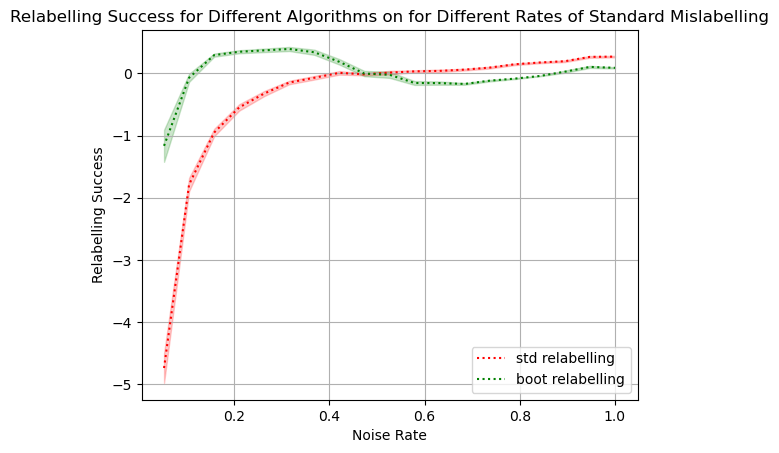

In [6]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 20
TEST_SIZE = 0.25
ITERATIONS = 10

accuracies_all, relabelling_all, noise_levels = run_relabelling_experiment(data, RandomForestClassifier, symmetric_noise, n_estimators=N_ESTIMATORS, trials=TRIALS, resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS)
accuracies_mean, accuracies_se, relabelling_success, relabelling_se, x_axis = process_experiment_results(accuracies_all, relabelling_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="std accuracy", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="boot accuracy", color="green")
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="ctrl accuracy", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

# Relabelling success (skip index 0 to avoid div by zero)
plot_with_error_band(x_axis[1:], relabelling_success[0][1:], relabelling_se[0][1:], label="std relabelling", color="red", linestyle=":")
plot_with_error_band(x_axis[1:], relabelling_success[1][1:], relabelling_se[1][1:], label="boot relabelling", color="green", linestyle=":")

plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success")
plt.title("Relabelling Success for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

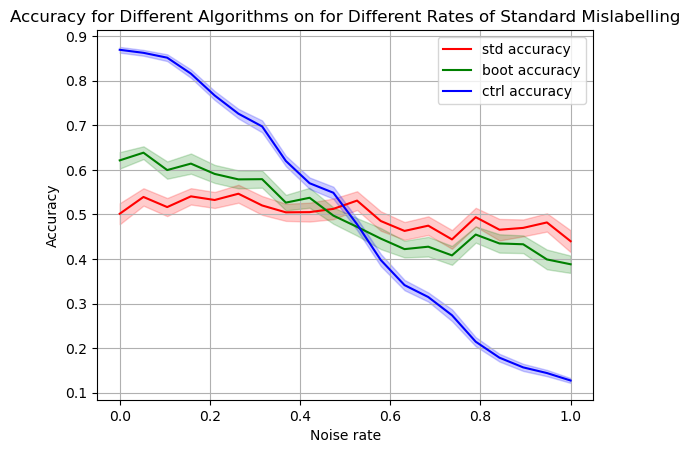

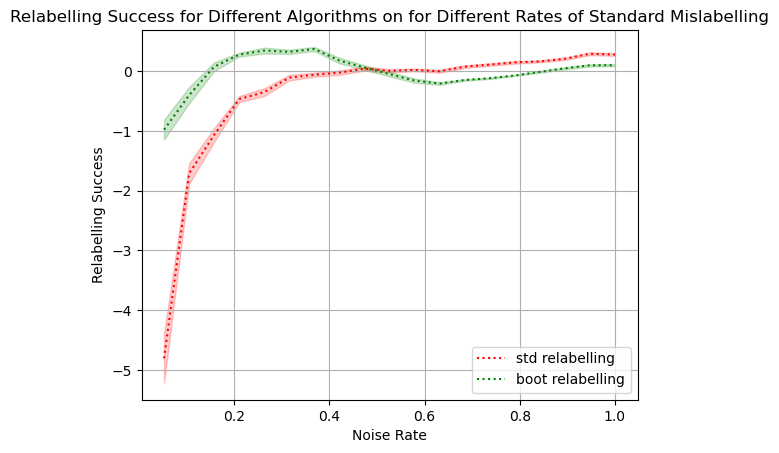

In [7]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 10
TEST_SIZE = 0.25
ITERATIONS = 10

accuracies_all, relabelling_all, noise_levels = run_relabelling_experiment(data, RandomForestClassifier, symmetric_noise, n_estimators=N_ESTIMATORS, trials=TRIALS, resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS)
accuracies_mean, accuracies_se, relabelling_success, relabelling_se, x_axis = process_experiment_results(accuracies_all, relabelling_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="std accuracy", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="boot accuracy", color="green")
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="ctrl accuracy", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

# Relabelling success (skip index 0 to avoid div by zero)
plot_with_error_band(x_axis[1:], relabelling_success[0][1:], relabelling_se[0][1:], label="std relabelling", color="red", linestyle=":")
plot_with_error_band(x_axis[1:], relabelling_success[1][1:], relabelling_se[1][1:], label="boot relabelling", color="green", linestyle=":")

plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success")
plt.title("Relabelling Success for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

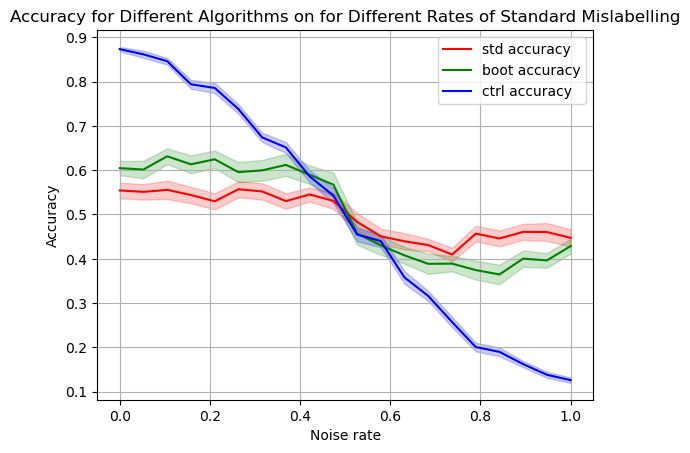

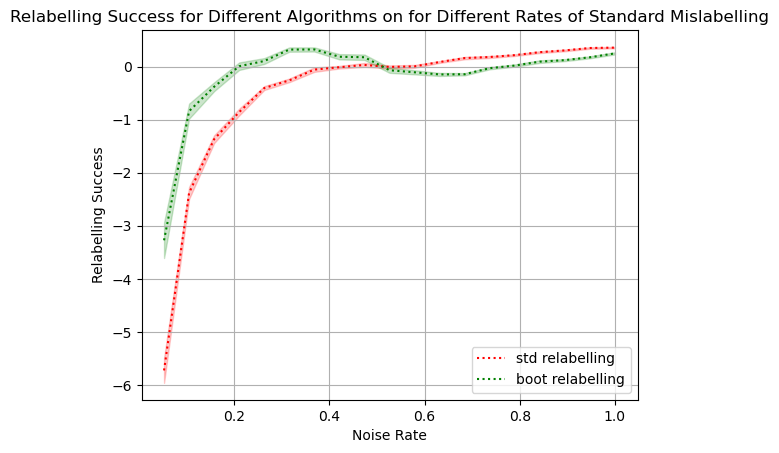

In [8]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 20
TEST_SIZE = 0.25
ITERATIONS = 10

accuracies_all, relabelling_all, noise_levels = run_relabelling_experiment(data, RandomForestClassifier, symmetric_noise, n_estimators=N_ESTIMATORS, trials=TRIALS, resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS, initial_certainty=0.65)
accuracies_mean, accuracies_se, relabelling_success, relabelling_se, x_axis = process_experiment_results(accuracies_all, relabelling_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="std accuracy", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="boot accuracy", color="green")
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="ctrl accuracy", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

# Relabelling success (skip index 0 to avoid div by zero)
plot_with_error_band(x_axis[1:], relabelling_success[0][1:], relabelling_se[0][1:], label="std relabelling", color="red", linestyle=":")
plot_with_error_band(x_axis[1:], relabelling_success[1][1:], relabelling_se[1][1:], label="boot relabelling", color="green", linestyle=":")

plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success")
plt.title("Relabelling Success for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

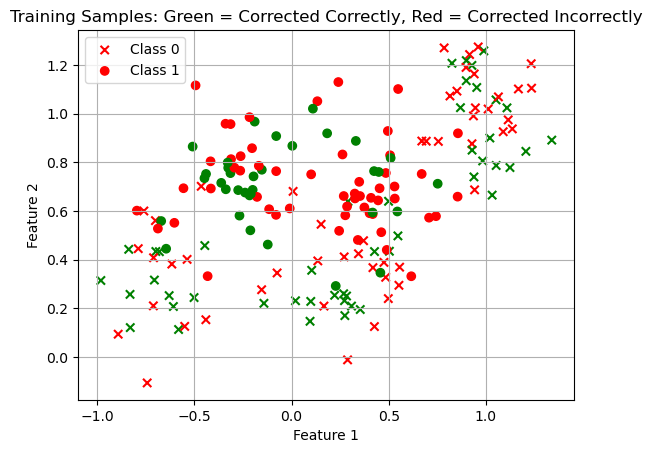

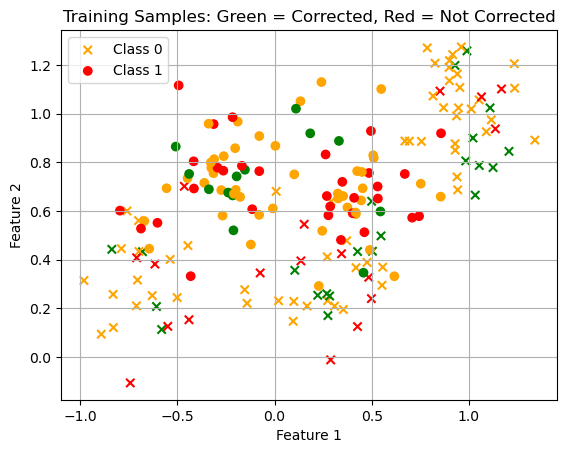

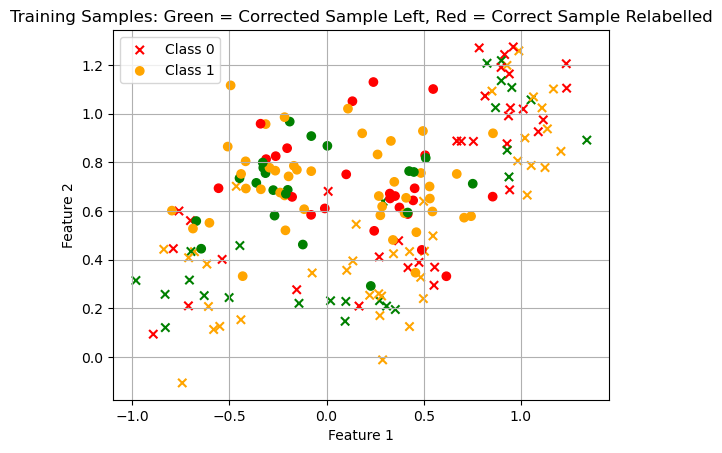

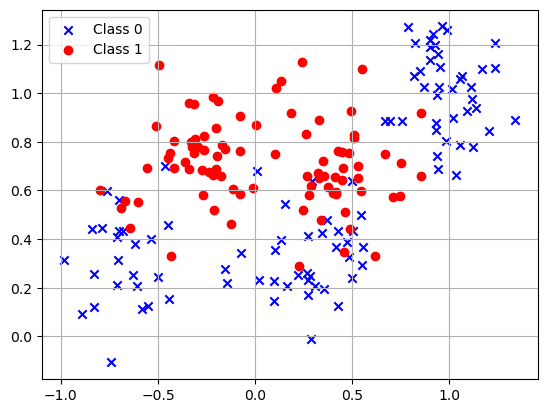

In [14]:
y_mislabelled = symmetric_noise(np.copy(y_train), 0.4)
rf_40, corrected_y = train(RandomForestClassifier, X_train, y_mislabelled, data.target_names, 20, initial_certainty=0.65, relabelling=False)

# Separate samples by class (assuming binary classification: 0 and 1)
class0_idx = y_train == 0
class1_idx = y_train == 1

# Get colors: green if corrected label is correct, red otherwise
colors = ['green' if y_true == y_corr else 'red' 
          for y_true, y_corr in zip(y_train, corrected_y)]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Correctly, Red = Corrected Incorrectly")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if sample was mislabelled and relabelled correctly, red otherwise
colors = ['orange' if y_mislabelled[i] == y_train[i] else 'green' if y_mislabelled[i] != y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected, Red = Not Corrected")
plt.legend()
plt.grid(True)
plt.show()

# Get colors: green if correct sample was left alone, red otherwise
colors = ['orange' if y_mislabelled[i] != y_train[i] else 'green' if y_mislabelled[i] == y_train[i] and corrected_y[i] == y_train[i] else 'red' 
          for i in range(len(y_train))]

# Make sure colors align with X_train
colors = np.array(colors)

# Plot class 0 as "x"
plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c=colors[class0_idx], marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c=colors[class1_idx], marker='o', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Samples: Green = Corrected Sample Left, Red = Correct Sample Relabelled")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(X_train[class0_idx, 0], X_train[class0_idx, 1], 
            c='blue', marker='x', label='Class 0')

# Plot class 1 as "o"
plt.scatter(X_train[class1_idx, 0], X_train[class1_idx, 1], 
            c='red', marker='o', label='Class 1')
plt.legend()
plt.grid(True)
plt.show()

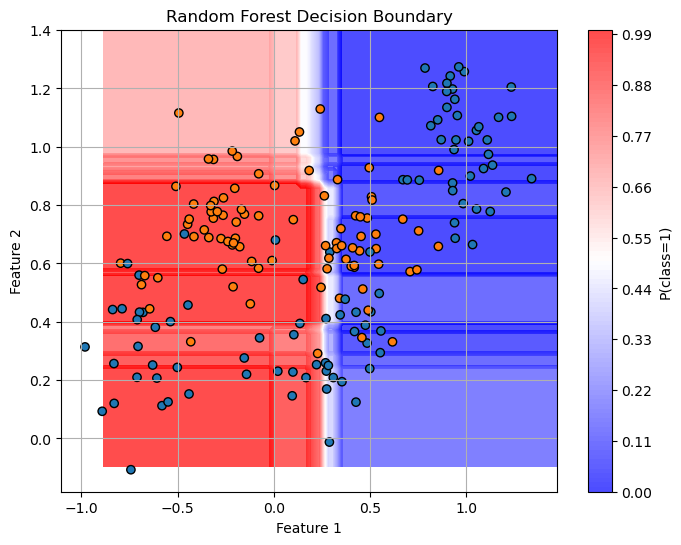

In [15]:
plot_rf_decision_boundary(rf_40, X_train, y_train)